<a href="https://colab.research.google.com/github/eunpro/academy/blob/main/exam07_classification_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#onehot인코더
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from tensorflow.keras import datasets

In [ ]:
#mnist: 28*28픽셀에 0~255값에 따라 색상 부여해서 이미지 뽑음
(X_train, Y_train),(X_test, Y_test) = datasets.mnist.load_data() 
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


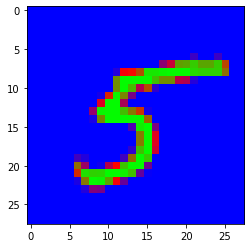

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0  30   0   0  30   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  70
  100 206 210 229 210 210 229 162   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  18 124 133 166 

In [ ]:
#0~255 사이 숫자가 클수록 밝은색 나타냄
my_sample = np.random.randint(60000) #0~5999 중 하나 뽑음
plt.imshow(X_train[my_sample],cmap='brg') #cmap색상지정
#plt.imshow(X_train[my_sample])#색상 임의로 입혀준 것
plt.show()
print(Y_train[my_sample])
print(X_train[my_sample])

In [ ]:
#label을 10개까지 OneHot encoder로 변형
#keras에 np_utils포함됨
#OneHot encoder: 희소행렬로 변환시켜줌
#to_categorical 사용하면 onehot인코더 적용됨 
y_train = np_utils.to_categorical(Y_train) #희소행렬에서 1값의 위치 알려줌
y_test = np_utils.to_categorical(Y_test) #희소행렬 나열해서 보여줌

In [ ]:
print(Y_train[2000])
print(y_train[2000])#값에 따른 희소행렬 위치를 나타내줌

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
#minmax스케일링: 최소값이 0, 최대값이 1되도록 스케일링
x_train = X_train.reshape(-1, 28*28)#28*28=784
x_test = X_test.reshape(-1, 28*28)
x_train = x_train / 255 #=> minmax스케일링 : 0~1사이의 값으로 나타내기 위해 
x_test = x_test / 255 #=> minmax스케일링 : 0~1사이의 값으로 나타내기 위해 
print(x_train.shape)

(60000, 784)


모델링 작업

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=784,
                activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
#다중분류기에서는 맨 마지막 function은 softmax사용
#softmax의 총 합 1
model.add(Dense(10,activation='softmax'))  #output10개

In [ ]:
#learning rate: 어느 정도의 크기로 기울기가 줄어드는 지점으로 이동하겠는가를 나타내는 지표
opt = Adam(lr = 0.01) #발산할 수 있으므로 learning rate설정
model.compile(opt, loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_38 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_39 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_40 (Dense)             (None, 10)                2570      
Total params: 269,450
Trainable params: 269,450
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


트레인데이터가6만개면 배치사이즈 천 주면 1000개씩 60그룹으로 랜덤으로 나눔

에포크: 총 6만개를 몇번 돌릴지

배치사이즈: 6만개를 얼마 크기로 나눠서 학습시킬지

In [ ]:
fit_hist = model.fit(x_train, y_train,
                     batch_size=600, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
80/80 [==============================] - 2s 24ms/step - loss: 0.0275 - accuracy: 0.9913 - val_loss: 0.0372 - val_accuracy: 0.9882
Epoch 2/10
80/80 [==============================] - 2s 21ms/step - loss: 0.0306 - accuracy: 0.9903 - val_loss: 0.0595 - val_accuracy: 0.9827
Epoch 3/10
80/80 [==============================] - 2s 21ms/step - loss: 0.0254 - accuracy: 0.9924 - val_loss: 0.0468 - val_accuracy: 0.9872
Epoch 4/10
80/80 [==============================] - 2s 21ms/step - loss: 0.0263 - accuracy: 0.9918 - val_loss: 0.0523 - val_accuracy: 0.9849
Epoch 5/10
80/80 [==============================] - 2s 21ms/step - loss: 0.0198 - accuracy: 0.9937 - val_loss: 0.0451 - val_accuracy: 0.9873
Epoch 6/10
80/80 [==============================] - 2s 21ms/step - loss: 0.0218 - accuracy: 0.9934 - val_loss: 0.0602 - val_accuracy: 0.9846
Epoch 7/10
80/80 [==============================] - 2s 21ms/step - loss: 0.0260 - accuracy: 0.9923 - val_loss: 0.0675 - val_accuracy: 0.9827
Epoch 8/10
80

In [ ]:
score = model.evaluate(x_test,y_test, verbose=0)
print('Final test set accuracy : ', score[1])

Final test set accuracy :  0.975600004196167


fit_hist = model.fit(x_train, y_train,
                     batch_size=600, epochs=10, validation_split=0.2, verbose=1)

 validation_split=0.2 지정하면 val_accuracy 생성됨


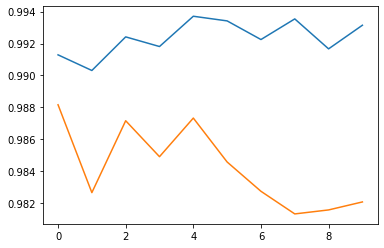

In [ ]:
plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.show()

5
[[4.8013821e-17 1.5947821e-20 1.6582004e-16 1.6438843e-09 2.3131120e-20
  1.0000000e+00 5.3377904e-16 2.2356457e-17 1.3742693e-12 1.7190324e-11]]
5


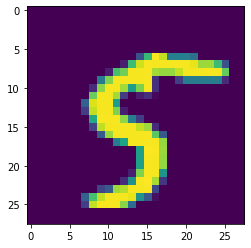

In [ ]:
my_sample = np.random.randint(10000)
plt.imshow(X_test[my_sample])
print(Y_test[my_sample])
pred = model.predict(x_test[my_sample].reshape(-1,784))
print(pred)
print(np.argmax(pred))